In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/Insurance_data1.csv')

df

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   charges  1338 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.0 KB


In [45]:
df.describe()

,age,charges
count,1338.000000,1338.000000
mean,39.207025,13270.422265
std,14.049960,12110.011237
min,18.000000,1121.873900
25%,27.000000,4740.287150
50%,39.000000,9382.033000
75%,51.000000,16639.912515
max,64.000000,63770.428010


In [46]:
df.dtypes

age          int64
charges    float64
dtype: object

No need to check Duplicates

In [47]:
df.isnull().sum()

age        0
charges    0
dtype: int64

In [49]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

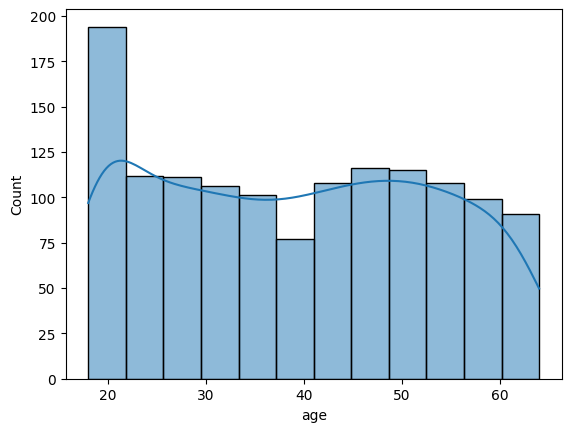

In [50]:
sns.histplot(df['age'], kde=True)

plt.show()

## As the distribution is unifrom there is no pint to look for outliners

### liner relasionship

In [51]:
target = df[['charges']]

feature = df[['age']]

In [52]:
#crelationship

sns.scatterplot(x=feature, y=target)
sns.lineplot(x=feature, y=target, data=df, color='red')
plt.show()

ValueError: If using all scalar values, you must pass an index

In [53]:
df1 = df.groupby(['age'])[['charges']].mean()

df1

,charges
age,
18,7086.217556
19,9747.909335
20,10159.697736
21,4730.464330
22,10012.932802
23,12419.820040
24,10648.015962
25,9838.365311
26,6133.825309


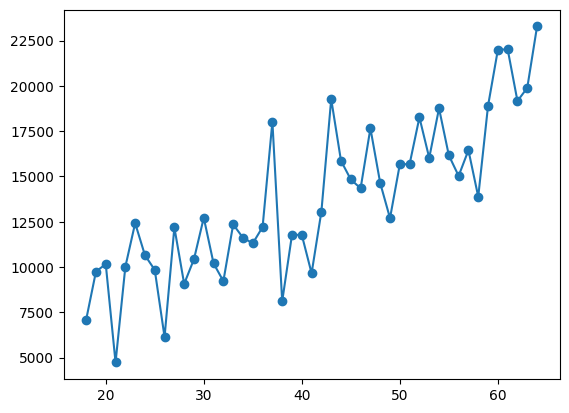

In [54]:
plt.scatter(df1.index, df1['charges'])
plt.plot(df1.index, df1['charges'])
plt.show()

### **We can Clearly see there is a possitive relationship between Age and Charges**

## Simple learniner regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [57]:
print('Total', len(df))
print('Train', len(x_train))
print('Test', len(x_test))

Total 1338
Train 1070
Test 268


## Model Training

In [59]:
linreg = LinearRegression() # object creation

linreg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
y_pred = linreg.predict(x_test)

In [64]:
linreg.predict([[50]])

/home/riyan/Desktop/SDHub-DS/SDHub-DS/05 Machine Learning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15906.75667363]])

#